### Spectral analysis of the edge space

In [2]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [3]:
from sclibrary.network_reader import NetworkReader
from sclibrary.simplicial_complex import SimplicialComplexNetwork
from sclibrary.plot import SCPlot

from matplotlib import pyplot as plt

In [4]:
data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, 
                           src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)

simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# coordinates
filename = data_folder + '/coordinates.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")


# create a simplicial complex network
sc = SimplicialComplexNetwork(simplices=simplices)
# create a plot
scplot = SCPlot(sc, coordinates)

#### Eigendecomposition

In [5]:
import numpy as np
from sclibrary.eigendecomposition import (get_harmonic_eigenvectors, 
                                          get_curl_eigenvectors, 
                                          get_gradient_eigenvectors,
                                          )

In [6]:
k = 1
L1 = sc.hodge_laplacian_matrix(rank=k)
L1U = sc.upper_laplacian_matrix(rank=k)
L1L = sc.lower_laplacian_matrix(rank=k)

u_h, eigenvals_h = get_harmonic_eigenvectors(L1)
u_c, eigenvals_c = get_curl_eigenvectors(L1U)
u_g, eigenvals_g = get_gradient_eigenvectors(L1L)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/eigendecomposition.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
  u_g = u_g.astype(np.float64)
/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/eigendecomposition.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvalues = np.asarray(


In [7]:
print("Eigenvalues:", eigenvals_h)
u_h

Eigenvalues: [0.]


array([[ 0.06889728],
       [ 0.13779457],
       [-0.20669185],
       [ 0.06889728],
       [-0.34448642],
       [ 0.55117828],
       [-0.55117828],
       [-0.36745217],
       [-0.18372609],
       [ 0.18372609]])

In [8]:
print("Eigenvalues:", eigenvals_c)
# covert all values to float
u_c = u_c.astype(float)
u_c

Eigenvalues: [2. 4. 3.]


array([[ 5.00000000e-01, -3.53553385e-01,  0.00000000e+00],
       [-1.50107407e-16,  7.07106769e-01,  0.00000000e+00],
       [-5.00000000e-01, -3.53553385e-01,  0.00000000e+00],
       [ 5.00000000e-01, -3.53553385e-01,  0.00000000e+00],
       [ 5.00000000e-01,  3.53553385e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -5.77350259e-01],
       [ 0.00000000e+00,  0.00000000e+00,  5.77350259e-01],
       [ 0.00000000e+00,  0.00000000e+00, -5.77350259e-01]])

In [9]:
print("Eigenvalues:", eigenvals_g)
u_g

Eigenvalues: [5.48811531 4.45752954 2.32800913 3.59808946 3.31390762 0.81434923]


array([[-0.05878212, -0.36745653,  0.48619685, -0.46687335, -0.09433983,
         0.13607138],
       [ 0.32946974, -0.47395313,  0.0652547 , -0.10648241, -0.31280029,
        -0.1854457 ],
       [-0.1462567 , -0.53557879, -0.32671991, -0.279232  , -0.02961399,
        -0.29740456],
       [ 0.38825187, -0.10649659, -0.42094216,  0.36039096, -0.21846044,
        -0.32151708],
       [-0.47572643, -0.06162565, -0.3919746 , -0.17274958,  0.28318629,
        -0.11195885],
       [-0.49028891,  0.2168476 ,  0.10910526, -0.04279641, -0.21460989,
        -0.59076518],
       [ 0.30512139,  0.41316539,  0.26664403, -0.29986769, -0.08504377,
        -0.51395106],
       [-0.31968388, -0.13469216,  0.23443583,  0.42982084, -0.41275239,
         0.03514474],
       [-0.12263153, -0.28346965,  0.39679703,  0.50137603,  0.27091977,
        -0.23514785],
       [ 0.19705234, -0.14877748,  0.16236119,  0.07155522,  0.68367219,
        -0.27029258]])

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:143: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


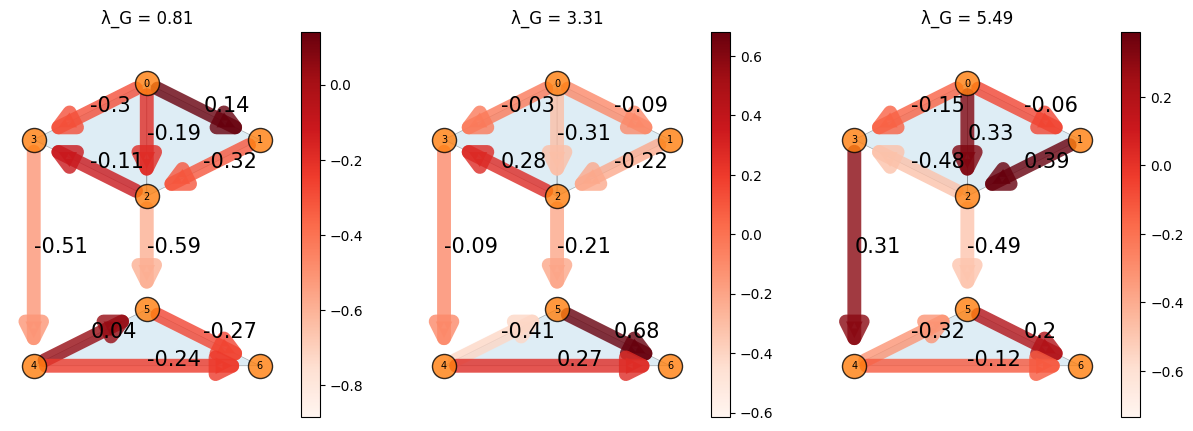

In [10]:
fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(1, 3, 1)
ax.set_title("λ_G = {}".format(round(eigenvals_g[-1], 2)))
flow = u_g[:, -1]
flow = np.round(flow, 2)
scplot.draw_flow(flow=flow, ax=ax)

ax = fig.add_subplot(1, 3, 2)
ax.set_title("λ_G = {}".format(round(eigenvals_g[4], 2)))
flow = u_g[:, 4]
flow = np.round(flow, 2)
scplot.draw_flow(flow=flow, ax=ax)

ax = fig.add_subplot(1, 3, 3)
ax.set_title("λ_G = {}".format(round(eigenvals_g[0], 2)))
flow = u_g[:, 0]
flow = np.round(flow, 2)
scplot.draw_flow(flow=flow, ax=ax)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:143: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


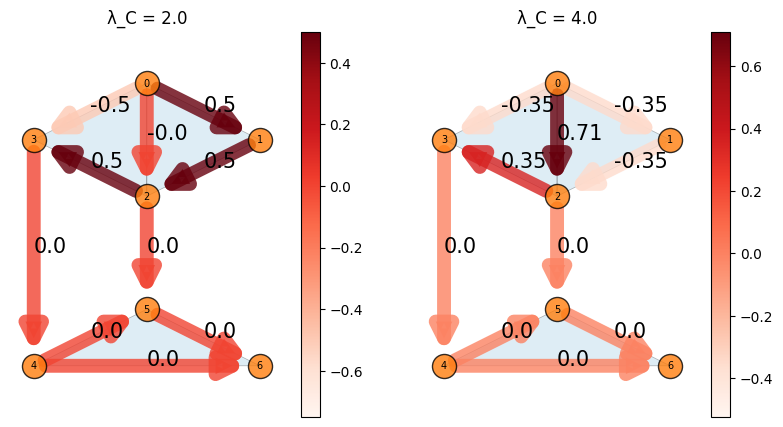

In [13]:
fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(1, 3, 1)
ax.set_title("λ_C = {}".format(round(eigenvals_c[0], 2)))
flow = u_c[:, 0]
flow = np.round(flow, 2)
scplot.draw_flow(flow=flow, ax=ax)

ax = fig.add_subplot(1, 3, 2)
ax.set_title("λ_C = {}".format(round(eigenvals_c[1], 2)))
flow = u_c[:, 1]
flow = np.round(flow, 2)
scplot.draw_flow(flow=flow, ax=ax)